In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [33]:
heart_disease_data = pd.read_csv('./data/heart_disease_uci.csv').set_index('id')
heart_disease_data

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2


In [34]:
missing_values = heart_disease_data.isnull().sum()
missing_values_percentage = (missing_values / len(heart_disease_data)) * 100
missing_values_percentage[missing_values_percentage > 0]


,0
trestbps,6.413043
chol,3.260870
fbs,9.782609
restecg,0.217391
thalch,5.978261
exang,5.978261
oldpeak,6.739130
slope,33.586957
ca,66.413043
thal,52.826087


In [35]:
heart_disease_data = heart_disease_data.drop(columns=['dataset', 'slope', 'ca', 'thal'], errors='ignore')

heart_disease_data = heart_disease_data.dropna()

heart_disease_data.isnull().sum().sum()


0

In [36]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


obj = heart_disease_data.select_dtypes(include=['object']).columns
bools = heart_disease_data.select_dtypes(include=['bool']).columns
for col in obj:
    heart_disease_data[col] = LabelEncoder().fit_transform(heart_disease_data[col])

for col in bools:
    heart_disease_data[col] = OneHotEncoder().fit_transform(heart_disease_data[col])

heart_disease_data['num'] = heart_disease_data['num'].apply(lambda x: 1 if x > 0 else 0)

X = heart_disease_data.drop(columns=['num'])
y = heart_disease_data['num']



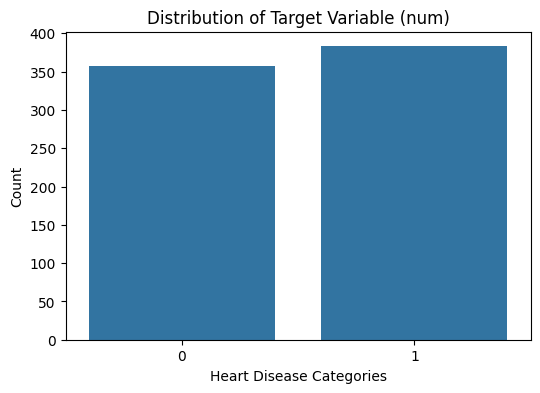

In [37]:
plt.figure(figsize=(6, 4))
sns.countplot(x='num', data=heart_disease_data)
plt.title('Distribution of Target Variable (num)')
plt.xlabel('Heart Disease Categories')
plt.ylabel('Count')
plt.show()

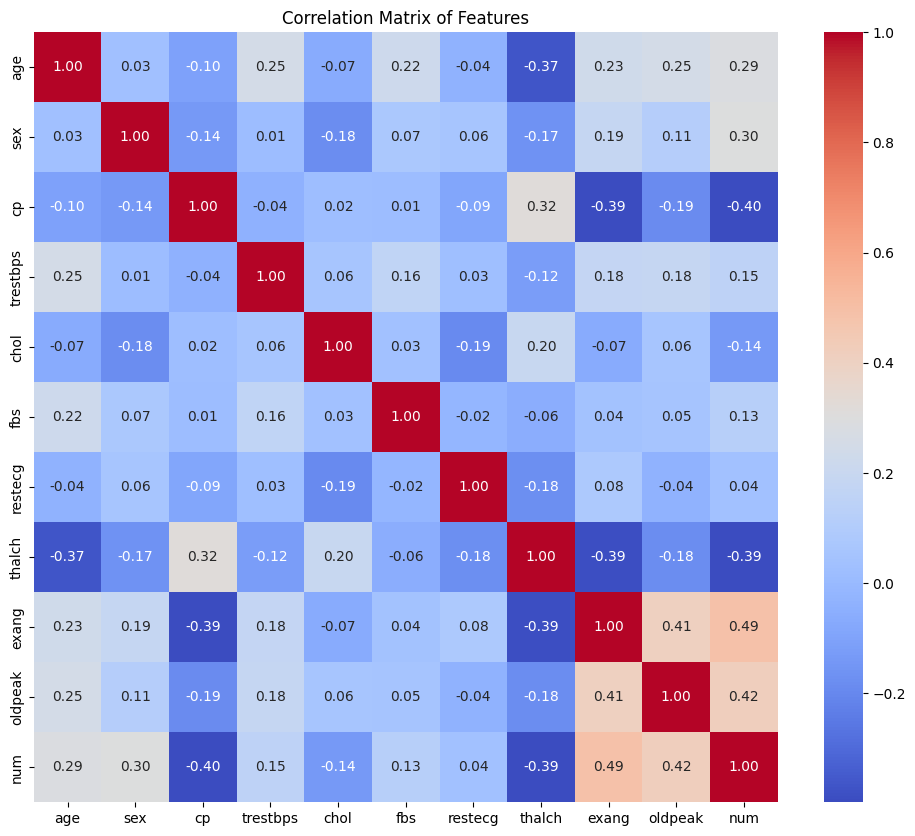

In [38]:
plt.figure(figsize=(12, 10))
correlation_matrix = heart_disease_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()

In [39]:
heart_disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,53.097297,0.764865,0.787838,132.754054,220.136486,0.150000,0.925676,138.744595,0.400000,0.894324,0.517568
std,9.408127,0.424370,0.950529,18.581250,93.614555,0.357313,0.627421,25.846082,0.490229,1.087160,0.500029
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-1.000000,0.000000
25%,46.000000,1.000000,0.000000,120.000000,197.000000,0.000000,1.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,231.000000,0.000000,1.000000,140.000000,0.000000,0.500000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,271.000000,0.000000,1.000000,159.250000,1.000000,1.500000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [41]:
from sklearn import metrics

def plot_confusion_matrix(actual, predicted):

    num_categories=len(set(actual))

    confusion_matrix = metrics.confusion_matrix(actual, predicted)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = np.arange(num_categories))

    cm_display.plot()
    plt.show()

CE loss: 0.40081806539219716
              precision    recall  f1-score   support

           0       0.86      0.81      0.84        75
           1       0.82      0.86      0.84        73

    accuracy                           0.84       148
   macro avg       0.84      0.84      0.84       148
weighted avg       0.84      0.84      0.84       148



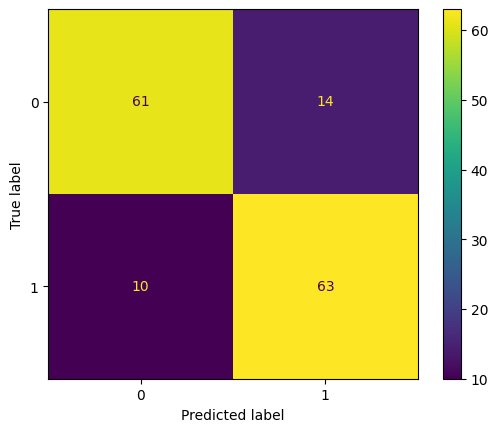

In [42]:
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)
standard_log_loss = log_loss(y_test, y_pred_proba)

print(f'CE loss: {standard_log_loss}')
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

In [43]:

err_nonprivate = 1 - metrics.accuracy_score(y_test, y_pred)

## DPML

In [44]:
dim = X.shape[1]
n = X.shape[0]

# the following bounds are chosen independent to the data
x_bound = 1
y_bound = 1

if not isinstance(X, np.ndarray):
    X = X.to_numpy()

if not isinstance(y, np.ndarray):
    y = y.to_numpy()

if not isinstance(X_train, np.ndarray):
    X_train = X_train.to_numpy()

if not isinstance(y_train, np.ndarray):
    y_train = y_train.to_numpy()

if not isinstance(X_test, np.ndarray):
    X_test = X_test.to_numpy()

if not isinstance(y_test, np.ndarray):
    y_test = y_test.to_numpy()


In [45]:
def CE(score,y):
    # numerically efficient vectorized implementation of CE loss
    log_phat = np.zeros_like(score)
    log_one_minus_phat = np.zeros_like(score)
    mask = score > 0
    log_phat[mask] = - np.log( 1 + np.exp(-score[mask]))
    log_phat[~mask] = score[~mask] - np.log( 1 + np.exp(score[~mask]))
    log_one_minus_phat[mask] = -score[mask] - np.log( 1 + np.exp(-score[mask]))
    log_one_minus_phat[~mask] = - np.log( 1 + np.exp(score[~mask]))

    return -y*log_phat-(1-y)*log_one_minus_phat

def loss(theta):
    return np.sum(CE(X@theta,y))/n

def err(theta):
    return np.sum((X@theta > 0) != y) / n

def err_yhat(yhat):
    return np.sum((yhat != y)) / n

In [46]:
!pip install autodp

In [47]:
from autodp.autodp_core import Mechanism
from autodp.mechanism_zoo import GaussianMechanism
from autodp.transformer_zoo import ComposeGaussian


In [48]:
class NoisyGD_mech(Mechanism):
    def __init__(self,sigma,coeff,name='NoisyGD'):
        Mechanism.__init__(self)
        self.name = name
        self.params={'sigma':sigma,'coeff':coeff}

        # ----------- Implement noisy-GD here with "GaussianMechanism" and "ComposeGaussian" ----------------

        gm = GaussianMechanism(sigma,name='Release_gradient')
        # compose them with the transformation: ComposeGaussian.
        compose = ComposeGaussian()
        mech = compose([gm], [coeff])

        # ------------- return a Mechanism object named 'mech' --------------------

        self.set_all_representation(mech)

In [49]:
def stable_softmax(x):
    z = x - max(x)
    numerator = np.exp(z)
    denominator = np.sum(numerator)
    softmax = numerator/denominator

    return softmax


In [50]:
def gradient(theta):
    # -----------  Implement the gradient of f(theta) -----------

    grad = np.zeros(shape=(dim,))

    phat = stable_softmax(X@theta)

    # print(phat)

    grad = X[y==0,:].T@(phat[y==0]) -X[y==1,:].T@(1-phat[y==1].T)
    # ----------- Notice that f is the sum of the individual loss functions, NOT the averge. -----------
    return grad

In [51]:
def GS_bound(theta):
    # ----------- Calculate the global sensitivity, given theta -------------
    # Note that you may start with a constant upper bound then consider using a more adaptive bound

    GS = 100
    bound = np.linalg.norm(theta)
    GS = x_bound /(1+np.exp(-bound))

    GS_const = x_bound

    # ------------------------
    return GS

In [52]:
def run_NoisyGD_step(theta,sigma, lr):
    GS = GS_bound(theta)
    return theta - lr * (gradient(theta)  + GS*sigma*np.random.normal(size=theta.shape))


In [53]:
def run_NoisyGD(sigma,lr,niter, log_gap = 10):
    theta_GD = np.zeros(shape=(dim,))
    err_GD = []
    eps_GD = []
    for i in range(niter):
        theta_GD = run_NoisyGD_step(theta_GD,sigma, lr)
        if not i%log_gap:
            mech = NoisyGD_mech(sigma,i+1)
            eps_GD.append(mech.approxDP(delta))
            err_GD.append(loss(theta_GD))
    return err_GD, eps_GD


In [54]:
# function to run NoisyGD
def run_nonprivate_GD(lr,niter, log_gap = 10):
    theta_GD = np.zeros(shape=(dim,))
    err_GD = []
    for i in range(niter):
        theta_GD = run_NoisyGD_step(theta_GD,0, lr)
        if not i%log_gap:
            err_GD.append(err(theta_GD))
    return err_GD

In [55]:
theta = np.zeros(shape=(dim,))
ss = gradient(theta)

In [56]:
from autodp.calibrator_zoo import eps_delta_calibrator

def find_appropriate_niter(sigma, eps,delta):
    # Use autodp calibrator for selecting 'niter'
    NoisyGD_fix_sigma = lambda x:  NoisyGD_mech(sigma,x)
    calibrate = eps_delta_calibrator()
    mech = calibrate(NoisyGD_fix_sigma, eps, delta, [0,500000])
    niter = int(np.floor(mech.params['coeff']))
    return niter


# Instantiate these parameters

def theoretical_lr_choice(beta_L,f0_minus_fniter_bound,dim,sigma,niter):
    # beta_L is the gradient lipschitz constant for the whole objective function
    # sigma is the variance of the gradient noise in each coordinate
    # niter is the intended number of iterations (the LR is optimized for the point we get when finishing all niter)


    return np.minimum(1/beta_L,np.sqrt(2*f0_minus_fniter_bound / (dim * sigma**2 *beta_L*niter)))

In [57]:
beta = 1/4*n

f0_minus_fniter_bound  =  n*(-np.log(0.5))

GS = x_bound


# Large noise
sigma = 300.0
eps = 2.0
delta = 1e-6
niter = find_appropriate_niter(sigma, eps,delta)

print(niter)

lr = theoretical_lr_choice(beta,f0_minus_fniter_bound,dim,sigma*GS,niter)

err_GD1, eps_GD1 = run_NoisyGD(sigma,lr,niter)

# Small noise
sigma = 30
niter = find_appropriate_niter(sigma, eps,delta)
print(niter)
# niter = 500
lr = theoretical_lr_choice(beta,f0_minus_fniter_bound, dim,sigma*GS,niter)
err_GD2, eps_GD2 = run_NoisyGD(sigma,lr,niter)


# no noise baseline
err_GD0= run_nonprivate_GD(1/beta,niter)

18090
180


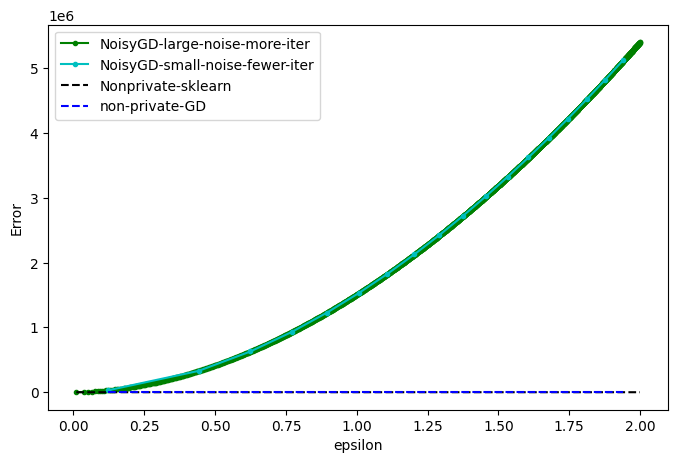

In [58]:
## Let's also plot the results
import matplotlib.pyplot as plt
#%matplotlib inline
plt.figure(figsize=(8, 5))
#plt.plot(eps_GD2, err_GD0,'b.-')
plt.plot(eps_GD1, err_GD1,'g.-')
plt.plot(eps_GD2, err_GD2,'c.-')
plt.plot(eps_GD1,err_nonprivate*np.ones_like(eps_GD1),'k--')
plt.plot(eps_GD2,err_GD0,'b--')
#plt.ylim([0,0.1])

plt.legend(['NoisyGD-large-noise-more-iter','NoisyGD-small-noise-fewer-iter','Nonprivate-sklearn','non-private-GD'])
plt.xlabel('epsilon')
plt.ylabel('Error')
plt.show()

In [59]:
!pip install diffprivlib


In [89]:
from diffprivlib.models import LogisticRegression as DPLogisticRegression

# Define epsilon values
epsilons = np.logspace(-3, 1, 500)

# Lists to store errors
dp_errors = []
dp_accs = []

for epsilon in epsilons:
    dp_model = DPLogisticRegression(epsilon=epsilon, data_norm=1, random_state=42)
    dp_model.fit(X_train, y_train)
    y_pred_dp = dp_model.predict(X_test)
    dp_error = log_loss(y_test, y_pred_dp)
    dp_acc = np.mean(y_test == y_pred_dp)
    dp_errors.append(dp_error)
    dp_accs.append(dp_acc)

In [93]:
dp_clf = DPLogisticRegression(random_state=42)
dp_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/diffprivlib/models/logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


LogisticRegression(accountant=BudgetAccountant(spent_budget=[(1.0, 0), (0.1, 0), (0.3111111111111111, 0), (0.5222222222222223, 0), (0.7333333333333333, 0), ...]),
                   data_norm=7.549685814802667, random_state=42)

In [94]:
print("Differentially private test accuracy (epsilon=%.2f): %.2f%%" %
     (dp_clf.epsilon, dp_clf.score(X_test, y_test) * 100))

Differentially private test accuracy (epsilon=1.00): 59.46%


In [103]:
from diffprivlib.utils import check_random_state

accuracy = []
epsilons = np.logspace(-3, 3, 500)
random_state = check_random_state(42)

for eps in epsilons:
    dp_clf = DPLogisticRegression(epsilon=eps, data_norm=100, random_state=random_state)
    dp_clf.fit(X_train, y_train)
    accuracy.append(dp_clf.score(X_test, y_test))

In [104]:
import pickle
pickle.dump((epsilons, np.mean(y_test == y_pred), accuracy), open("lr_accuracy_500.p", "wb" ) )

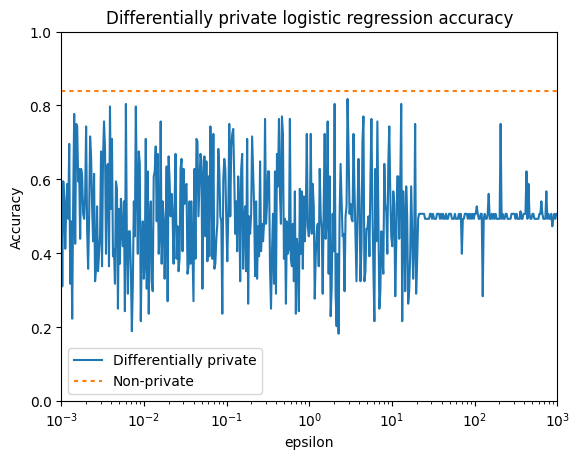

In [105]:
import matplotlib.pyplot as plt
import pickle

epsilons, baseline, accuracy = pickle.load(open("lr_accuracy_500.p", "rb"))

plt.semilogx(epsilons, accuracy, label="Differentially private")
plt.plot(epsilons, np.ones_like(epsilons) * baseline, dashes=[2,2], label="Non-private")
plt.title("Differentially private logistic regression accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xlim(epsilons[0], epsilons[-1])
plt.legend(loc=3)
plt.show()

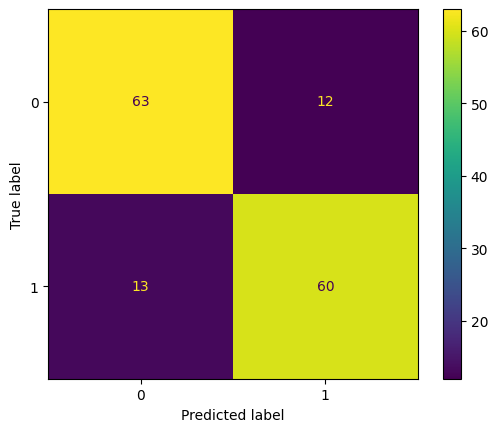

              precision    recall  f1-score   support

           0       0.83      0.84      0.83        75
           1       0.83      0.82      0.83        73

    accuracy                           0.83       148
   macro avg       0.83      0.83      0.83       148
weighted avg       0.83      0.83      0.83       148



In [121]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

In [109]:
from diffprivlib.models import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/diffprivlib/models/naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [118]:
import numpy as np
import matplotlib.pyplot as plt

epsilons = np.logspace(-2, 2, 500)
bounds = (X_train.min(axis=0), X_train.max(axis=0))
accuracy = list()
losses = list()

for epsilon in epsilons:
    clf = GaussianNB(epsilon=epsilon, bounds = bounds, random_state=42)
    clf.fit(X_train, y_train)

    accuracy.append(clf.score(X_test, y_test))
    losses.append(log_loss(y_test, clf.predict(X_test)))

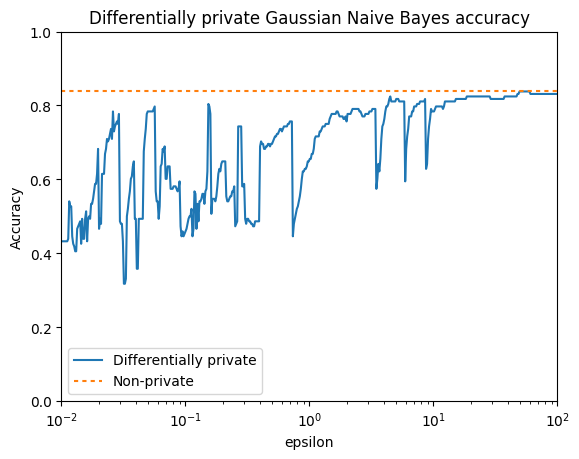

In [119]:
import pickle
pickle.dump((epsilons, np.mean(y_test == y_pred), accuracy), open("lr_accuracy_500.p", "wb" ) )

plt.semilogx(epsilons, accuracy, label="Differentially private")
plt.plot(epsilons, np.ones_like(epsilons) * baseline, dashes=[2,2], label="Non-private")
plt.title("Differentially private Gaussian Naive Bayes accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xlim(epsilons[0], epsilons[-1])
plt.legend(loc=3)
plt.show()

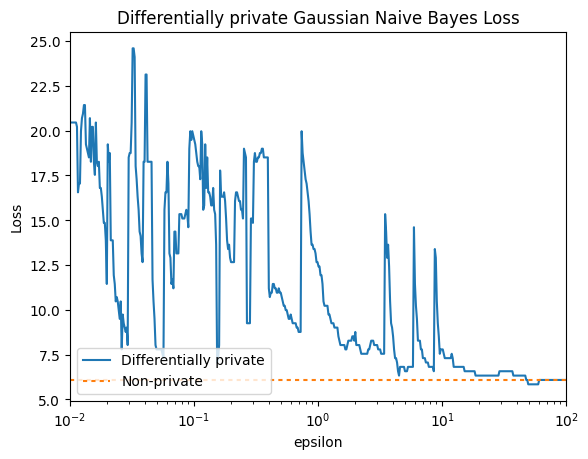

In [123]:
pickle.dump((epsilons, log_loss(y_test, y_pred), losses), open("lr_loss_500.p", "wb" ) )

plt.semilogx(epsilons, losses, label="Differentially private")
plt.plot(epsilons, np.ones_like(epsilons) * log_loss(y_test, y_pred), dashes=[2,2], label="Non-private")
plt.title("Differentially private Gaussian Naive Bayes Loss")
plt.xlabel("epsilon")
plt.ylabel("Loss")

plt.xlim(epsilons[0], epsilons[-1])
plt.legend(loc=3)
plt.show()